# Logistic Regression

<font color = "brown"><font size = 5> Context </font>
    
<font size = 3> Here we have to figure out based on the data which customer is most likely to default. </font>

<font size =5 color = "brown"> Data Dictionary </font>

* Customer_ID: ID of credit requestor
* Status_Checking_Acc: Account status of the credit requestor
* Duration_in_Months: Time duration for repayment of the credit amount
* Credit_History:Credit re-payment history of the requestor
* Purpose_Credit_Taken: Purpose for which the credit ws taken
* Credit_Amount: Amount that was taken as credit
* Savings_Acc: Type of account
* Years_At_Present_Employment: The time for which the person has been working at the present Employed location.
* Inst_Rt_Income: Income through interest
* Marital_Status_Gender: Maritial status of the requestor
* Other_Debtors_Guarantors: Guarantors on other debts of the requestor
* Current_Address_Yrs: Years for which the requestor has been staying at the current address
* Property:Property type the requestor has
* Age: Age of the requestor
* Other_Inst_Plans
* Housing:Type of housing of the requestor
* Num_CC: Number of Credit Cards
* Job:Type of employment
* Dependents: The number of dependents on the requestor
* Telephone: Type of phone number provided
* Foreign_Worker: whether the requestor is a foreign worker
* Default_On_Payment: If the requestor is default on payment
----------------------------------

<font color = "brown" size = 5>Importing Libraries</font>

In [46]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,confusion_matrix,
                            accuracy_score, roc_auc_score, roc_curve,
                            recall_score, precision_score, f1_score)


# To enable plotting graphs in Jupyter notebook
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)# to display numbers in digits

In [47]:
# Reading the input data file
data = pd.read_csv("default_on_payment.csv")

Making a copy of the data to move ahead

In [48]:
df=data.copy()
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,1


#Check number of rows and columns

In [49]:
df.shape

(5000, 22)

In [50]:
df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

Removing Customer_ID from the dataframe as Customer_ID has unique values

In [51]:
df=df.drop("Customer_ID",axis=1)

Renaming the column Purposre_Credit_Taken as Purpose_Credit_Taken

In [52]:
df.rename(columns={"Purposre_Credit_Taken":"Purpose_Credit_Taken"},inplace=True)

Rmoving the space in the column names

In [53]:
df.columns = [col.replace(" ", "") for col in df.columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Status_Checking_Acc          5000 non-null   object
 1   Duration_in_Months           5000 non-null   int64 
 2   Credit_History               5000 non-null   object
 3   Purpose_Credit_Taken         5000 non-null   object
 4   Credit_Amount                5000 non-null   int64 
 5   Savings_Acc                  5000 non-null   object
 6   Years_At_Present_Employment  5000 non-null   object
 7   Inst_Rt_Income               5000 non-null   int64 
 8   Marital_Status_Gender        5000 non-null   object
 9   Other_Debtors_Guarantors     5000 non-null   object
 10  Current_Address_Yrs          5000 non-null   int64 
 11  Property                     5000 non-null   object
 12  Age                          5000 non-null   int64 
 13  Other_Inst_Plans             5000

<font size = 4 color = "blue"> Checking the number of unique values in each column </font>

In [55]:
df.nunique()

,0
Status_Checking_Acc,4
Duration_in_Months,33
Credit_History,5
Purpose_Credit_Taken,10
Credit_Amount,921
Savings_Acc,5
Years_At_Present_Employment,5
Inst_Rt_Income,4
Marital_Status_Gender,4
Other_Debtors_Guarantors,3


<font size = 4 color = "blue"> Checking for missing values  </font>

In [56]:
df.isna().sum()

,0
Status_Checking_Acc,0
Duration_in_Months,0
Credit_History,0
Purpose_Credit_Taken,0
Credit_Amount,0
Savings_Acc,0
Years_At_Present_Employment,0
Inst_Rt_Income,0
Marital_Status_Gender,0
Other_Debtors_Guarantors,0


<font size = 3> There are no missing values in all the columns </font>

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_in_Months,5000.000,20.903,12.054,4.000,12.000,18.000,24.000,72.000
Credit_Amount,5000.000,3271.258,2821.607,250.000,1365.500,2319.500,3972.250,18424.000
Inst_Rt_Income,5000.000,2.973,1.118,1.000,2.000,3.000,4.000,4.000
Current_Address_Yrs,5000.000,2.845,1.103,1.000,2.000,3.000,4.000,4.000
Age,5000.000,35.546,11.371,19.000,27.000,33.000,42.000,75.000
Num_CC,5000.000,1.407,0.577,1.000,1.000,1.000,2.000,4.000
Dependents,5000.000,1.155,0.362,1.000,1.000,1.000,1.000,2.000
Default_On_Payment,5000.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


In [58]:
df.describe(include='object').T

,count,unique,top,freq
Status_Checking_Acc,5000,4,A14,1970
Credit_History,5000,5,A32,2650
Purpose_Credit_Taken,5000,10,A43,1400
Savings_Acc,5000,5,A61,3015
Years_At_Present_Employment,5000,5,A73,1695
Marital_Status_Gender,5000,4,A93,2740
Other_Debtors_Guarantors,5000,3,A101,4535
Property,5000,4,A123,1660
Other_Inst_Plans,5000,3,A143,4070
Housing,5000,3,A152,3565


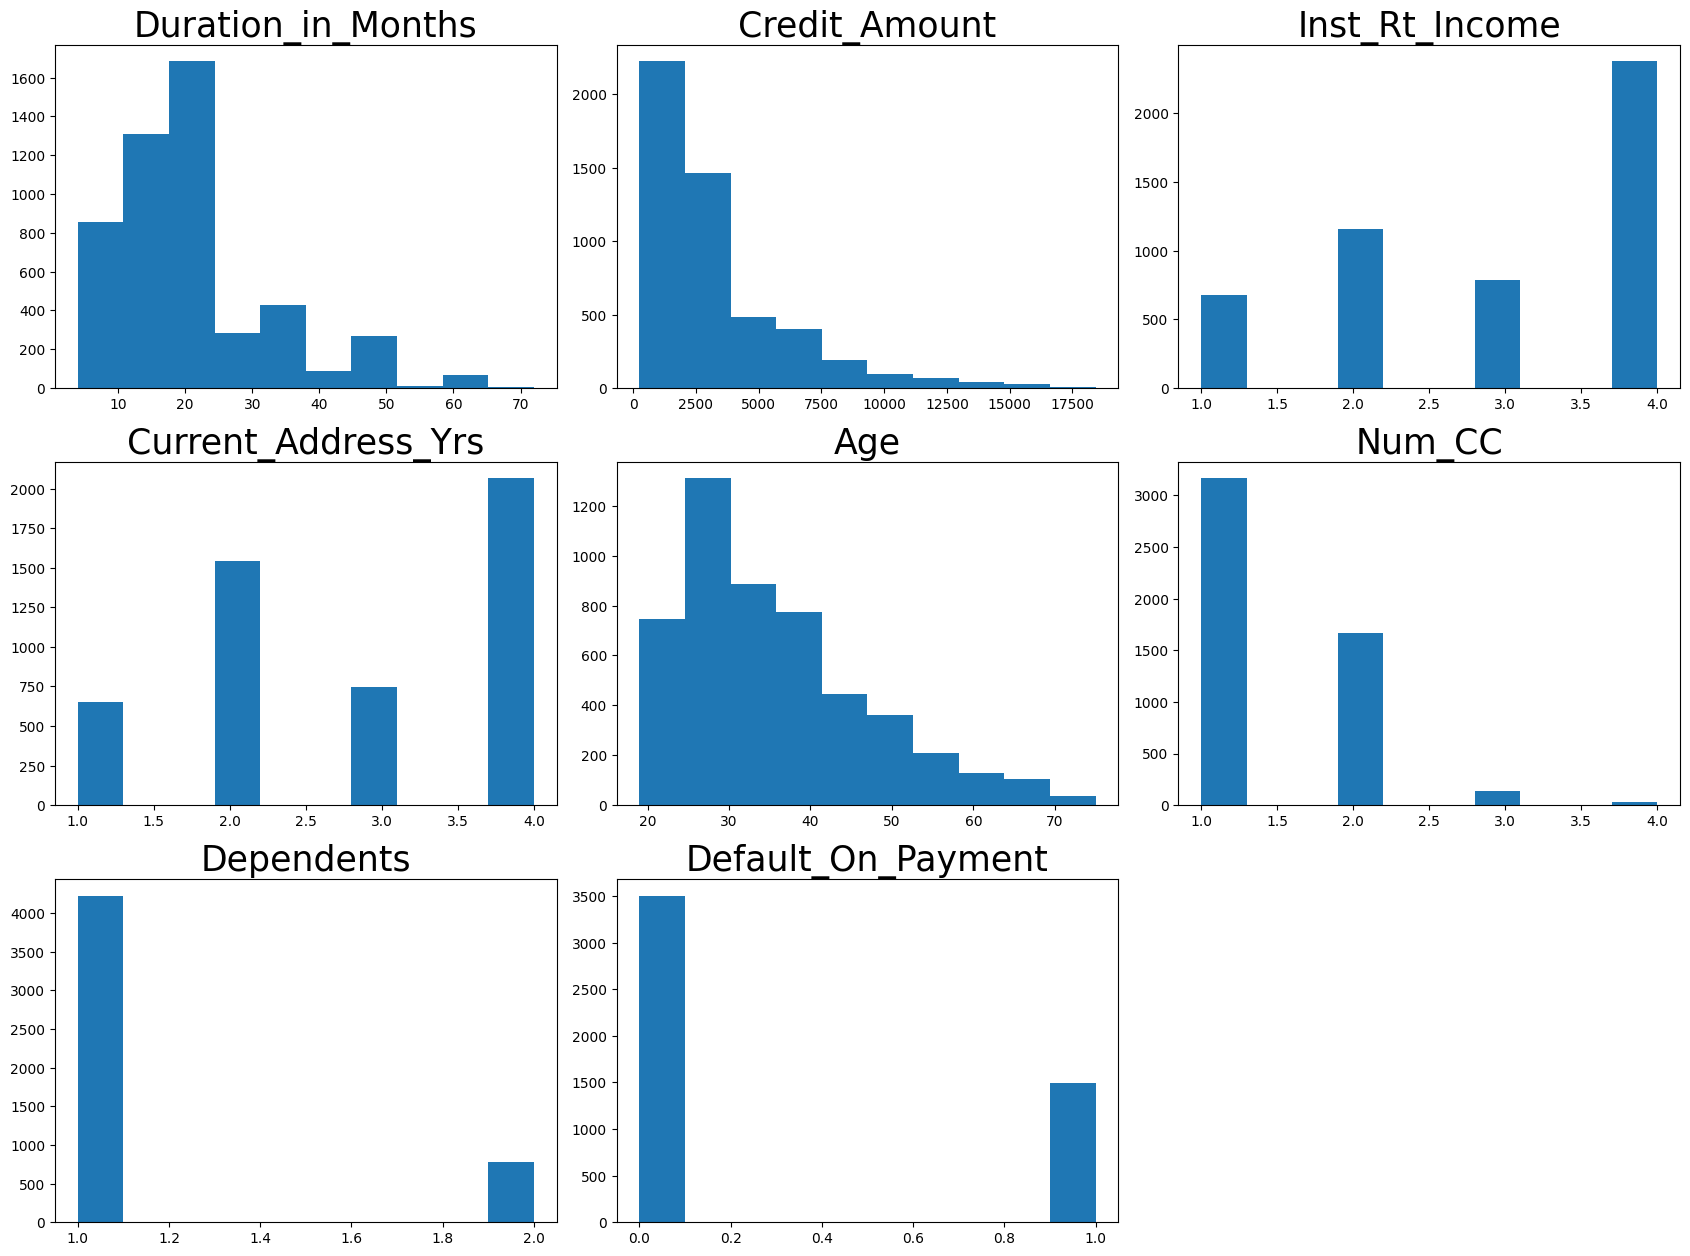

In [59]:
# lets plot histogram of all plots
from scipy.stats import norm
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(numeric_columns)):
    plt.subplot(18,3,i+1)
    plt.hist(df[numeric_columns[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(numeric_columns[i],fontsize=25)


plt.show()

Changing the type of Object column to category type

In [60]:
object_cols = df.select_dtypes(include=object).columns.tolist()
for i in object_cols:
    df[i] = df[i].astype('category')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Status_Checking_Acc          5000 non-null   category
 1   Duration_in_Months           5000 non-null   int64   
 2   Credit_History               5000 non-null   category
 3   Purpose_Credit_Taken         5000 non-null   category
 4   Credit_Amount                5000 non-null   int64   
 5   Savings_Acc                  5000 non-null   category
 6   Years_At_Present_Employment  5000 non-null   category
 7   Inst_Rt_Income               5000 non-null   int64   
 8   Marital_Status_Gender        5000 non-null   category
 9   Other_Debtors_Guarantors     5000 non-null   category
 10  Current_Address_Yrs          5000 non-null   int64   
 11  Property                     5000 non-null   category
 12  Age                          5000 non-null   int64   
 13  Oth

<font size = 5 color = "brown"> Model Building </font>

Separating the X and Y variables and Using Dummies to convert the categorical columns to Numerical type

In [62]:
## Defining X and Y variables
X = df.drop(['Default_On_Payment'], axis=1)
Y = df[['Default_On_Payment']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

<font size = 5 color = "brown"> Using sklearn to make the model </font>

In [63]:
logreg = LogisticRegression()

In [64]:
logreg.fit(x_train, y_train)

LogisticRegression()

<font size = 4 color = "blue"> Predicting on the train set with default cutoff to be 0.5 </font>

In [65]:
pred_train = logreg.predict(x_train)

confusion_matrix(y_train, pred_train)

array([[2240,  237],
       [ 575,  448]])

<font size = 4 color = "blue"> Predicting on the test set and see the results </font>

In [66]:
pred_test = logreg.predict(x_test)
confusion_matrix(y_test, pred_test)

array([[915, 113],
       [270, 202]])

In [67]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train))
print("Recall on test data:", recall_score(y_test, pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train))
print("Precision on test data:", precision_score(y_test, pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train))
print("f1 score on test data:", f1_score(y_test, pred_test))

Accuracy on train data: 0.768
Accuracy on test data: 0.7446666666666667


Recall on train data: 0.43792766373411535
Recall on test data: 0.4279661016949153


Precision on train data: 0.654014598540146
Precision on test data: 0.6412698412698413


f1 score on train data: 0.5245901639344263
f1 score on test data: 0.5133418043202033


<font size = 5 color = "brown"> Plot ROC-AUC curve and see the results </font>

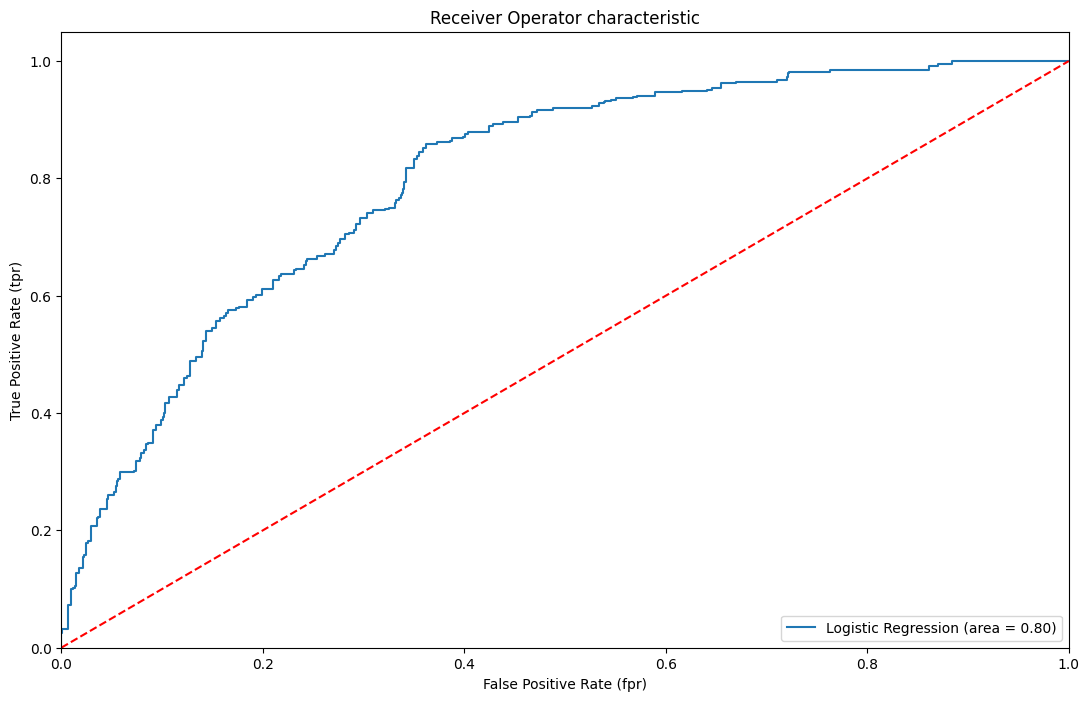

In [68]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<font size = 5 color = "brown"> Optimal Cutoff </font>

In [69]:
train_pred_prob = logreg.predict_proba(x_train)[:,1]

train_pred_prob

array([0.45591604, 0.42645678, 0.02347722, ..., 0.57306569, 0.05408981,
       0.92753969])

In [70]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0,1.01,0.01)

all_rows = []
for cutoff in Cutoff_Prob:
  y_train["pred_y"]=(train_pred_prob > cutoff).astype("int64")
  TP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 1)).sum()
  FN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 1)).sum()
  TN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 0)).sum()
  FP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 0)).sum()
  P = TP + FN
  N = TN + FP

  temp_data = {"Cutoff_Prob": cutoff,
               "TP": TP,
               "FN": FN,
               "TN": TN,
               "FP": FP,
               "P":  P,
               "N":  N}

  all_rows.append(temp_data) # append the row to the list

cutoff_data = pd.DataFrame(all_rows) # create DataFrame from collected rows

#Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis = 1, inplace=True)

In [71]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N
0,0.000,1023,0,0,2477,1023,2477
1,0.010,1023,0,33,2444,1023,2477
2,0.020,1023,0,190,2287,1023,2477
3,0.030,1023,0,336,2141,1023,2477
4,0.040,1015,8,487,1990,1023,2477


We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.

In [72]:
cutoff_data['Sn'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2) ** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] = 1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [73]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.000,1023,0,0,2477,1023,2477,1.000,0.000,1.000,0.000,1.000,0.292,1.000,1.000,0.452
1,0.010,1023,0,33,2444,1023,2477,1.000,0.013,0.987,0.013,1.000,0.295,1.000,0.987,0.456
2,0.020,1023,0,190,2287,1023,2477,1.000,0.077,0.923,0.077,1.000,0.309,1.000,0.923,0.472
3,0.030,1023,0,336,2141,1023,2477,1.000,0.136,0.864,0.136,1.000,0.323,1.000,0.864,0.489
4,0.040,1015,8,487,1990,1023,2477,0.992,0.197,0.803,0.189,0.992,0.338,0.992,0.803,0.504


Let us now check for the results now for accuracy using different cutoff methods. Let us pick up max distance first

In [74]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]), "Cutoff_Prob"]
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [75]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.23
The KS cutoff determined is: 0.21
The f1 cutoff determined is: 0.21


In [76]:
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train)[:,1] > cutoff).astype(int)
  y_pred_test  = (logreg.predict_proba(x_test)[:,1] > cutoff).astype(int)

  print("Using the cutoff value as:", cutoff)
  print('Accuracy on train data:',accuracy_score(y_train, y_pred_train) )
  print('Accuracy on test data:',accuracy_score(y_test, y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data:", f1_score(y_train, y_pred_train))
  print("f1 score on test data:", f1_score(y_test, y_pred_test))
  print("\n")

Using the cutoff value as: 0.23
Accuracy on train data: 0.7102857142857143
Accuracy on test data: 0.706
Recall on train data: 0.8181818181818182
Recall on test data: 0.8114406779661016
Precision on train data: 0.5027027027027027
Precision on test data: 0.5210884353741496
f1 score on train data: 0.6227678571428571
f1 score on test data: 0.6346313173156587


Using the cutoff value as: 0.21
Accuracy on train data: 0.7031428571428572
Accuracy on test data: 0.706
Recall on train data: 0.8455522971652004
Recall on test data: 0.8580508474576272
Precision on train data: 0.49541809851088203
Precision on test data: 0.5198973042362003
f1 score on train data: 0.6247742867461177
f1 score on test data: 0.6474820143884892


Using the cutoff value as: 0.21
Accuracy on train data: 0.7031428571428572
Accuracy on test data: 0.706
Recall on train data: 0.8455522971652004
Recall on test data: 0.8580508474576272
Precision on train data: 0.49541809851088203
Precision on test data: 0.5198973042362003
f1 score

Accuracy alone is not a parameter to consider when considering the decision of choosing a cutoff and making a final model. Let us check on the results above and decide which cutoff to select based on the highest recall since we want to predict the max correct number of people to be offered discount. We may at times need to take a decision to consider Recall, Precision or F1.

Looking at the above metrics, it makes sense to go ahead with the cutoff of 0.21 (KS Cutoff).

In [77]:
import numpy as np
import pandas as pd

def calculate_concordance(y_true, y_pred_prob):
    """
    Function to calculate Concordance, Discordance, and Tied pairs
    :param y_true: Actual binary outcomes (0 or 1)
    :param y_pred_prob: Predicted probabilities from logistic regression model
    :return: Concordance, Discordance, and Tied percentages
    """
    df = pd.DataFrame({'Actual': y_true, 'Predicted_Prob': y_pred_prob})

    # Separate positive and negative cases
    pos = df[df['Actual'] == 1]
    neg = df[df['Actual'] == 0]

    concordant = 0
    discordant = 0
    ties = 0

    # Compare all positive-negative pairs
    for p in pos['Predicted_Prob']:
        for n in neg['Predicted_Prob']:
            if p > n:
                concordant += 1
            elif p < n:
                discordant += 1
            else:
                ties += 1

    total_pairs = concordant + discordant + ties
    concordance = (concordant / total_pairs) * 100
    discordance = (discordant / total_pairs) * 100
    ties_percentage = (ties / total_pairs) * 100

    return {
        'Concordance': concordance,
        'Discordance': discordance,
        'Tied Pairs': ties_percentage
    }

In [78]:
# Compute Concordance, Discordance, and Tied Pairs
y_train = y_train.values.ravel() # Converts 2D to 1D
result = calculate_concordance(y_train, train_pred_prob)

# Display results
print("Concordance: {:.2f}%".format(result['Concordance']))
print("Discordance: {:.2f}%".format(result['Discordance']))
print("Tied Pairs: {:.2f}%".format(result['Tied Pairs']))


Concordance: 81.22%
Discordance: 18.78%
Tied Pairs: 0.00%
